In [1]:
#Import the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data=pd.read_csv('../input/brain-stroke-dataset/brain_stroke.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
data.describe().style.background_gradient(cmap='ocean_r')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
data.shape

(4981, 11)

<AxesSubplot:>

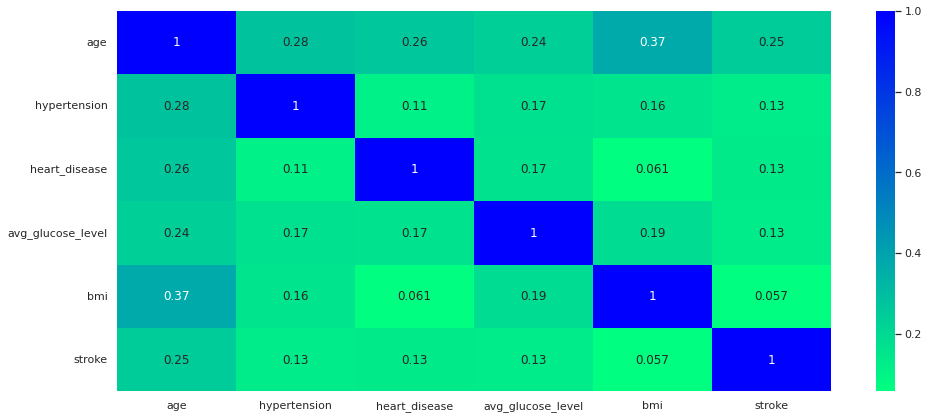

In [6]:
sns.set(rc={'figure.figsize':(16,7)})
sns.heatmap(data.corr(),annot=True,cmap='winter_r')

# Explore Data Analysis

In [7]:
#To visualize the gender in the dataset
import plotly.express as px
fig = px.pie(data,names='gender',title="Let's visualize the gender in the dataset")
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

In [8]:
#To visualize the Loan_Amount_Term using the plotly 
fig = px.histogram(data,x="age",color='gender', title="To visualize the age",color_discrete_sequence=['red','blue'])
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='black')
fig.show()

In [9]:
fig=px.histogram(data,x='bmi',y='avg_glucose_level',color='heart_disease',title="Tovisualize the bmi with heart diesease prediction")
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='yellow')
fig.show()

In [10]:
fig=px.histogram(data,x='age',y='avg_glucose_level',color='hypertension',title="To visualize the bmi with hypertension prediction")
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='pink')
fig.show()

In [11]:
fig=px.histogram(data,x='age',y='bmi',color='stroke',title="To visualize the bmi with stroke prediction",color_discrete_sequence=['red','black'])
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='blue')
fig.show()

In [12]:
fig = px.pie(data,names='smoking_status',title="Let's visualize the gender in the dataset",color_discrete_sequence=['pink','gray','#556B2F','#FF6347'])
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#228B22', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='blue'
fig.show()

In [13]:
fig=px.histogram(data,x='bmi',y='age',color='Residence_type',title="To visualize the bmi with age prediction",color_discrete_sequence=['#1E90FF','#A0522D'])
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='#90EE90')
fig.show()

In [14]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
label=LabelEncoder()
data['gender']=label.fit_transform(data['gender'])
data['ever_married']=label.fit_transform(data['ever_married'])
data['work_type']=label.fit_transform(data['work_type'])
data['Residence_type']=label.fit_transform(data['Residence_type'])
data['smoking_status']=label.fit_transform(data['smoking_status'])


In [16]:
#divided the data into X and y
X=data.drop(['stroke'],axis=1)
y=data['stroke']

In [17]:
#divived the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
#LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
#Prediction
logistic_pred=logistic.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [19]:
print(f'The accuracy score is {logistic.score(X_train,y_train)*100:.2f}')
print(f'The accuracy score is {accuracy_score(y_test,logistic_pred)*100:.2f}')

The accuracy score is 95.21
The accuracy score is 94.46


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1177
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1246
   macro avg       0.47      0.50      0.49      1246
weighted avg       0.89      0.94      0.92      1246



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<AxesSubplot:>

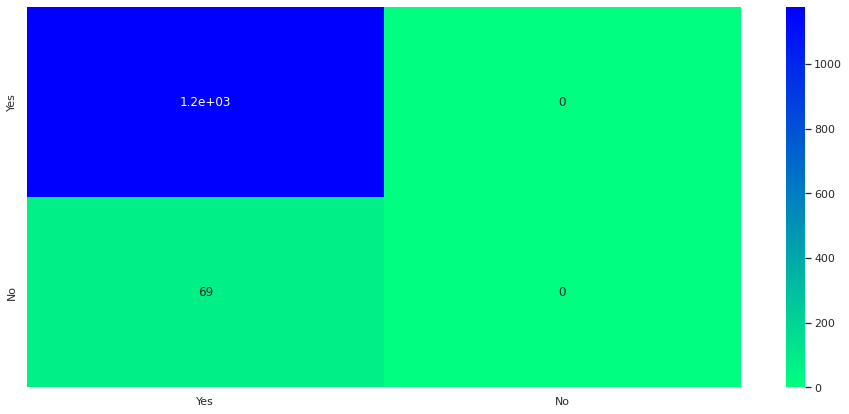

In [20]:
print(classification_report(y_test,logistic_pred))
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='winter_r',xticklabels=['Yes','No'],yticklabels=['Yes','No'])

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
#Prediction
tree_pred=tree.predict(X_test)

In [22]:
print(f'The accuracy train score is {tree.score(X_train,y_train)*100:.2f}')
print(f'The accuracy score is {accuracy_score(y_test,tree_pred)*100:.2f}')

The accuracy train score is 100.00
The accuracy score is 90.61


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1177
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1246
   macro avg       0.47      0.50      0.49      1246
weighted avg       0.89      0.94      0.92      1246



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<AxesSubplot:>

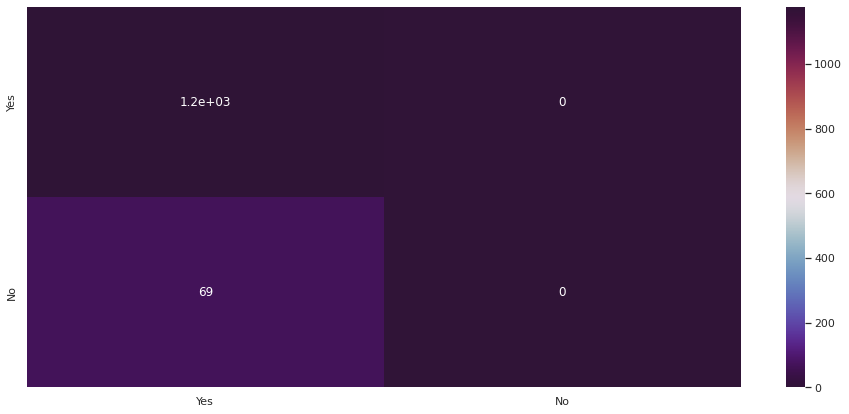

In [23]:
print(classification_report(y_test,logistic_pred))
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='twilight_shifted',xticklabels=['Yes','No'],yticklabels=['Yes','No'])

In [24]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)
random_pred=random.predict(X_test)

In [25]:
print(f'The accuracy train score is {random.score(X_train,y_train)*100:.2f}')
print(f'The accuracy score is {accuracy_score(y_test,random_pred)*100:.2f}')

The accuracy train score is 100.00
The accuracy score is 94.14


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1177
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1246
   macro avg       0.47      0.50      0.48      1246
weighted avg       0.89      0.94      0.92      1246



<AxesSubplot:>

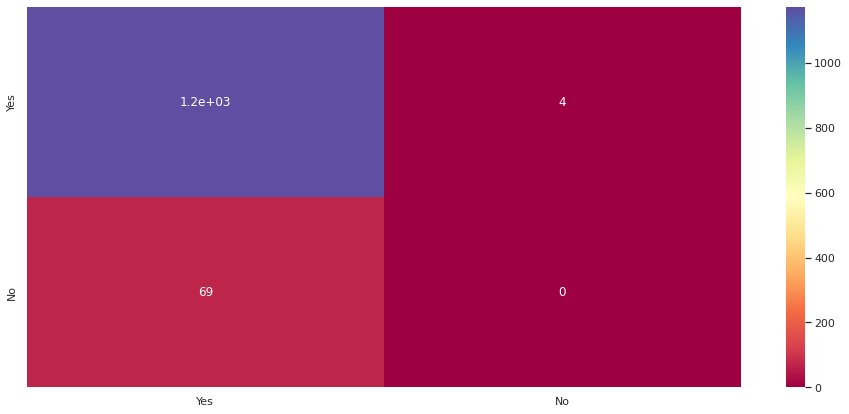

In [26]:
print(classification_report(y_test,random_pred))
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='Spectral',xticklabels=['Yes','No'],yticklabels=['Yes','No'])

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
#Prediction
knn_pred=knn.predict(X_test)

In [28]:
print(f'The accuracy train score is {knn.score(X_train,y_train)*100:.2f}')
print(f'The accuracy score is {accuracy_score(y_test,knn_pred)*100:.2f}')

The accuracy train score is 95.10
The accuracy score is 94.14


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1177
           1       0.17      0.01      0.03        69

    accuracy                           0.94      1246
   macro avg       0.56      0.51      0.50      1246
weighted avg       0.90      0.94      0.92      1246



<AxesSubplot:>

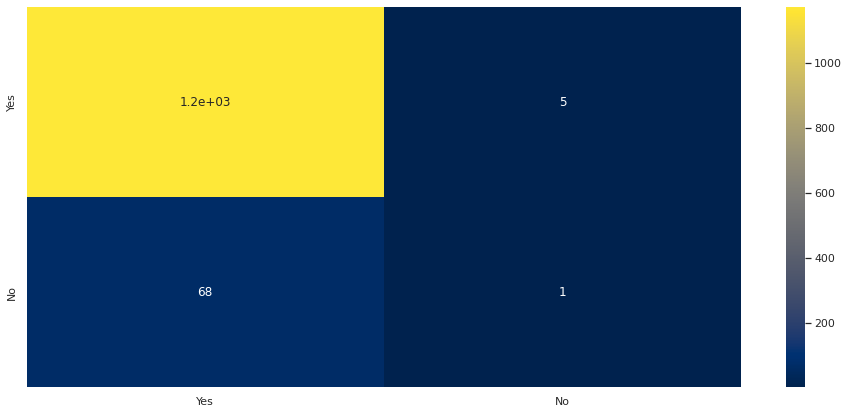

In [29]:
print(classification_report(y_test,knn_pred))
cn=confusion_matrix(y_test,knn_pred)
sns.heatmap(cn,annot=True,cmap='cividis',xticklabels=['Yes','No'],yticklabels=['Yes','No'])

In [30]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
#Prediction
xgb_pred=xgb.predict(X_test)

In [31]:
print(f'The accuracy train score is {xgb.score(X_train,y_train)*100:.2f}')
print(f'The accuracy score is {accuracy_score(y_test,xgb_pred)*100:.2f}')

The accuracy train score is 99.57
The accuracy score is 93.82


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1177
           1       0.17      0.03      0.05        69

    accuracy                           0.94      1246
   macro avg       0.56      0.51      0.51      1246
weighted avg       0.90      0.94      0.92      1246



<AxesSubplot:>

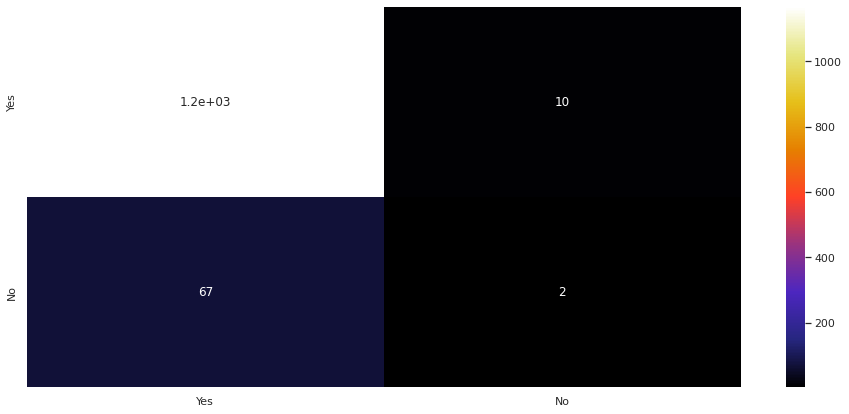

In [32]:
print(classification_report(y_test,xgb_pred))
cn=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cn,annot=True,cmap='CMRmap',xticklabels=['Yes','No'],yticklabels=['Yes','No'])